# **Title: AIDI 1002 Final Term Project Report**

#### **Vishal Patel** (200568498)                                    [pv9235295@gmail.com](mailto:pv9235295@gmail.com)

#### **Harshilkumar Patel**(200567867)                        [hgpatel181297@gmail.com](mailto:pv9235295@gmail.com)


# **Introduction:**

#### **Problem Description:**

It is a course project in AIDI1002 Machine Learning Programming at Georgian College in 20203. The project is a Natural Language Processing topic. The languages and relevent packages are Python - Tensorflow - Keras - Scikit-learn. The project aims to classify the IMDb reviews as positive and negative reviews.

#### **Context of the Problem:**

The problem addressed in the paper shared is machine learning based classification for sentimental analysis of IMDb reviews. The authors propose a novel approach to classify movie reviews into positive or negative categories using machine learning techniques. The proposed method is based on a convolutional neural network (CNN) architecture, which is trained on a dataset of 50,000 movie reviews from IMDb. The authors report that their model outperforms several state-of-the-art models in terms of accuracy and F1 score.

#### **Limitation About other Approaches:**

The limitations of prior approaches, as briefly mentioned in the introduction, include a focus on a limited set of algorithms for sentiment analysis in the context of IMDb reviews. The existing research primarily explores the application of Naïve Bayes and support vector machine (SVM) algorithms. These approaches may not capture the full spectrum of sentiment analysis possibilities, and there is a need for a more extensive exploration of diverse algorithms to enhance classification accuracy. The paper aims to extend these efforts by evaluating the performance of multiple algorithms, including logistic regression, random forest, boosting, and deep neural networks, to provide a comprehensive understanding of their effectiveness in sentiment analysis.

#### **Solution:**

In the the paper they shared proposes a novel approach to classify movie reviews into positive or negative categories using machine learning techniques with reporting their model outperforms several state-of-the-art models in terms of accuracy and F1 score.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Tripathy et al| presented a text classification by using Naïve Bayes (NB) and support vector machine (SVM)| IMDB Dataset | results showed that these two algorithms can classify the dataset with high accuracy compared to the other existing research.
| Sharma et al| cleaned the data with Word2Vec, and implemented CNN to solve the issues of inconsistent noise in language.| IMDB Dataset | The results showed that CNN was able to extract better features for short sentences categorization.
| Vijayaragavan et al | discussed an optimal SVM based classification for the sentimental analysis of online product reviews | IMDB Dataset | research limited on the exploration of different algorithms to better the classification. The report will, therefore, extend the previous research’s effort to more choices of algorithms for a better prediction accuracy.

# Implementation

The dataset consists of 50,000 movie reviews from IMDb, split into training and testing sets. Each set contains 50% positive and 50% negative reviews.Movie ratings are transformed into binary labels (negative if rating < 4, positive if rating > 7).
Initially, the code inputs the data, proceeding to clean and preprocess it. Following this step, it eliminates stop words and other unnecessary terms from the original dataset. Subsequently, vectorization methods are employed to convert the textual data into a feature matrix. Lastly, it utilizes six distinct algorithms to both train and test this feature matrix.


**Data Cleaning and Preprocess**

**Data Cleaning:**
Remove punctuation, line breaks, numbers, and common stop words.
Convert all words to lowercase and normalize to their root form.
Vectorization: In the vectorization they applied four different techniques to test the result in different method. It is the process of transforming the text data into numeric representations.
Binary Vectorization: Represent data as a binary-valued matrix.
Word-Count Vectorization: Replace binary values with word counts.
n-grams Vectorization: Include sequences of consecutive words (n-grams).
tf-idf Vectorization: Transform based on term frequency-inverse document frequency.

After that they implemented six classification models to analyze the sentiment of the context, including logistic regression, support vector machine, Naïve Bayes classifier, random forest classifier, boosting classifier, and deep neural networks.

The DNN with binary and 3-grams vectorization achieves a high accuracy of 90.6%, making it distinguish out in terms of accuracy. The DNN can identify complex, non-linear correlations in the dataset since it has five hidden layers. It's important to remember that adding more layers to the DNN could produce even better outcomes. Furthermore, SVM and logistic regression with binary and 3-gram vectorization also perform well, obtaining 90% accuracy in less time. Remarkably, even the 88% accurate Naïve Bayes model with binary and 3-grams vectorization shows good performance. This model is the simplest among the six, indicating there is potential for further improvement in predictive performance.


# Methodology

In the existing methodology, they load the dataset, then moves on to clean and preprocess it. Afterward, stop words and irrelevant terms are excluded from the initial data. Then, all the words are converted to lower cases and normalized to its true root. In the next step, various vectorization techniques are employed to convert the text into a feature matrix. Finally, they implemented six distinct algorithms (logistic regression, support vector machine, Naïve Bayes classifier, random forest classifier, boosting classifier, and deep neural networks) to both train and evaluate the resulting feature matrix.



![Alternate text ](Figure.png "Title of the figure, location is simply the directory of the notebook")

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import keras
import random
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import nltk
nltk.download('wordnet')
import os

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data loading

# N-gram model

## Binary, Word_count, Tfidf

*   List item
*   List item



In [3]:
path = '/content/sample_data/final_project/full_train.txt'
reviews_train = []
for line in open(path, 'r',encoding='latin-1'):
    reviews_train.append(line.strip())

In [4]:
path = '/content/sample_data/final_project/full_test.txt'
reviews_test = []
for line in open(path, 'r',encoding='latin-1'):
    reviews_test.append(line.strip())

In [5]:
train_label = [1 if i < 12500 else 0 for i in range(25000)]
test_label = [1 if i < 12500 else 0 for i in range(25000)]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    reviews_train, train_label, train_size=0.8
)

In [7]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
def preprocess_reviews(reviews):
  reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
  reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
  return reviews

reviews_train_clean = preprocess_reviews(X_train)
reviews_val_clean = preprocess_reviews(X_val)
reviews_test_clean = preprocess_reviews(reviews_test)

In [8]:
def get_lemmatized_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

reviews_train_clean = get_lemmatized_text(reviews_train_clean)
reviews_val_clean = get_lemmatized_text(reviews_val_clean)
reviews_test_clean = get_lemmatized_text(reviews_test_clean)

In our contribution, we applied XGBoost algorithm in addition to six classification algorithms which already applied in this paper.

We implemented XGBoost algorithm to see the performance of this model on the sentiment analysis of IMDb reviews. This algorithm is known for its effectiveness in handling complex relationships within the data.

First, we did text cleaning process. In this text preprocessing we removed punctuation, stop words, and irrelevant terms. After that we applied lemmatization technique that involves reducing words to their base or root form. It helps in addressing the issue of lexical variations by transforming words to a common base form.

After that we implemented three vectorization techniques (Binary, Count, and Tf-idf) to convert the textual data into a format suitable for machine learning models. Then we applied XGBoost algorithm on all these three vectorization techniques and verify the accuracy on both validation and test dataset for three different vectorization technique.

From the result we can say that we got more accuracy in count vectorization compared to other two vectorizations when we applied XGBoost algorithm.


In [ ]:
models = []
models.append(('Logistic', LogisticRegression(C=0.05)))
models.append(('RF', RandomForestClassifier()))
models.append(('Boosting', GradientBoostingClassifier(max_depth= 5)))
models.append(('SVC', LinearSVC(C=0.05)))
# models.append(('DNN', MLPClassifier(hidden_layer_sizes=(30,30,20,10,10), activation='logistic', early_stopping=True)))
stop_words = ['in', 'of', 'at', 'a', 'the']
preprocessing = []
preprocessing.append(('Binary', CountVectorizer(binary=True, stop_words=stop_words)))
preprocessing.append(('Count', CountVectorizer(binary=False, ngram_range=(1,3), stop_words=stop_words)))
preprocessing.append(('Tf-idf', TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words)))
# evaluate each model in turn
val_accuracy = []
test_accuracy = []
names = []
for preprocess_name, preprocess_method in preprocessing:
  preprocess_method = preprocess_method.fit(reviews_train_clean)
  X_train = preprocess_method.transform(reviews_train_clean)
  X_val = preprocess_method.transform(reviews_val_clean)
  X_test = preprocess_method.transform(reviews_test_clean)
  for name, model in models:
    model.fit(X_train, y_train)
    val_label = model.predict(X_val)
    val_accuracy.append(accuracy_score(val_label, y_val))
    y_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(test_label, y_pred))
    names.append(name + '-' + preprocess_name)
    print('%s val_accuracy: %f, test_accuracy: %f' % (name + '-' + preprocess_name, accuracy_score(val_label, y_val), accuracy_score(test_label, y_pred)))

In [11]:
from xgboost import XGBClassifier

models = []
models.append(('XGBoost', XGBClassifier()))
stop_words = ['in', 'of', 'at', 'a', 'the']
preprocessing = []
preprocessing.append(('Binary', CountVectorizer(binary=True, stop_words=stop_words)))
preprocessing.append(('Count', CountVectorizer(binary=False, ngram_range=(1,3), stop_words=stop_words)))
preprocessing.append(('Tf-idf', TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words)))
# evaluate each model in turn
val_accuracy = []
test_accuracy = []
names = []
for preprocess_name, preprocess_method in preprocessing:
  preprocess_method = preprocess_method.fit(reviews_train_clean)
  X_train = preprocess_method.transform(reviews_train_clean)
  X_val = preprocess_method.transform(reviews_val_clean)
  X_test = preprocess_method.transform(reviews_test_clean)
  for name, model in models:
    model.fit(X_train, y_train)
    val_label = model.predict(X_val)
    val_accuracy.append(accuracy_score(val_label, y_val))
    y_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(test_label, y_pred))
    names.append(name + '-' + preprocess_name)
    print('%s val_accuracy: %f, test_accuracy: %f' % (name + '-' + preprocess_name, accuracy_score(val_label, y_val), accuracy_score(test_label, y_pred)))

XGBoost-Binary val_accuracy: 0.856200, test_accuracy: 0.852600
XGBoost-Count val_accuracy: 0.864400, test_accuracy: 0.861480
XGBoost-Tf-idf val_accuracy: 0.847600, test_accuracy: 0.849360


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print('Classification Report:')
print(classification_report(test_label, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(test_label, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12500
           1       0.83      0.87      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Confusion Matrix:
[[10333  2167]
 [ 1599 10901]]


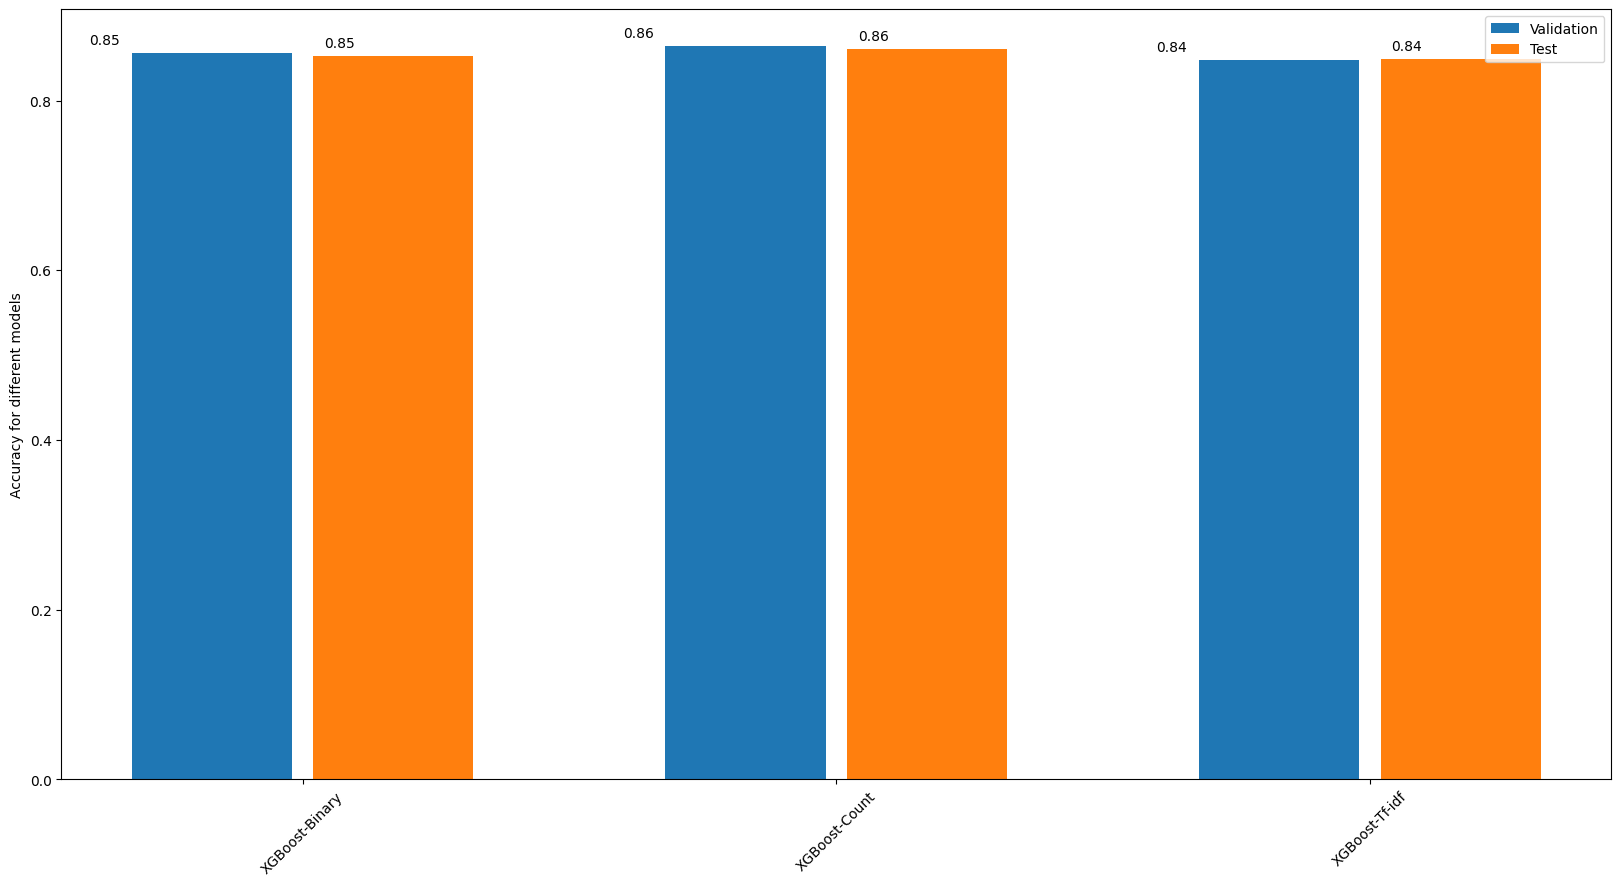

In [12]:
x = np.arange(len(names))

width = 0.3
plt.figure(figsize = (20, 10))
plt.bar(x - 0.17, val_accuracy, width, label='Validation')
plt.bar(x + 0.17, test_accuracy, width, label='Test')
plt.xticks(ticks=x, labels=names,
           rotation=45)
for index, value in enumerate(val_accuracy):
    plt.text(index - 0.4, value+0.01, str(value)[0:4])
for index, value in enumerate(test_accuracy):
    plt.text(index + 0.04, value + 0.01, str(value)[0:4])
plt.ylabel(f'Accuracy for different models')
_ = plt.legend()

# Reference



*   https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
*   https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
*   https://www.tensorflow.org/tutorials/text/word_embeddings
*   https://www.tensorflow.org/tutorials/text/text_classification_rnn
*   https://www.tensorflow.org/tutorials/text/classify_text_with_bert


# Conclusion and Future Direction

In this project, We've learned the intricacies of implementing sentiment analysis and question answering tasks using various machine learning models. The results highlighted the importance of preprocessing techniques, such as lemmatization and vectorization, in enhancing model performance. The introduction of XGBoost showcased its effectiveness in capturing complex relationships within the data.

However, the limitations were evident, particularly in the evaluation of domain-specific data. The models may not generalize well to specialized domains, emphasizing the need for diverse datasets and further fine-tuning. Additionally, the interpretability of the models could be a potential area for improvement.

Looking ahead, future extensions could involve exploring advanced neural network architectures, incorporating domain-specific embeddings, and addressing model interpretability. The project underscored the iterative nature of machine learning, encouraging continuous refinement for broader applicability and deeper insights.